# Importing Libraries

In [131]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [244]:
df_3 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")

df_3[df_3['Name'] == 'Smith, Mr. James Clinch']
#df_2[df_2['Name'] == 'Smith, Mr. James Clinch']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [133]:
print(df_3.shape, df_2.shape)

(891, 12) (418, 11)


In [134]:
y = df_3['Survived']

df_3 = df_3.drop(['Survived'], axis = 1)
df_3.shape

(891, 11)

In [135]:
df = pd.concat([df_3, df_2])

df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [136]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] =df['Embarked'].fillna('S')
df['Cabin'] = df['Cabin'].notnull()

df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

# Feature Engineering

In [137]:
df['name_s'] = df['Name'].apply(lambda x : x.split(".")[0].split(",")[1].strip())
df['name_s'].unique() 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [138]:
df['name_s'] = df['name_s'].replace('Mlle','Miss')
df['name_s'] = df['name_s'].replace('Mme','Mrs')
s = ( 'Major', 'Lady', 'Sir','the Countess', 'Jonkheer', 'Don', 'Rev', 'Dr','Capt','Col')
df['name_s'] =  df['name_s'].replace(s,'special')

In [139]:
df['Age'] = pd.qcut(df['Age'], q=4, labels = False)
df['Fare'] = pd.qcut(df['Fare'], q=4, labels = False)

In [140]:
df = df.drop(['Name', 'Ticket','PassengerId', 'Fare'], axis=1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null int64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Cabin       1309 non-null bool
Embarked    1309 non-null object
name_s      1309 non-null object
dtypes: bool(1), int64(4), object(3)
memory usage: 83.1+ KB


# Encoding

In [149]:
df_dum = pd.get_dummies(df, columns = ['Sex','Age','Cabin','name_s','Embarked'])
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Pclass            1309 non-null int64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Sex_female        1309 non-null uint8
Sex_male          1309 non-null uint8
Age_0             1309 non-null uint8
Age_1             1309 non-null uint8
Age_2             1309 non-null uint8
Age_3             1309 non-null uint8
Cabin_False       1309 non-null uint8
Cabin_True        1309 non-null uint8
name_s_Dona       1309 non-null uint8
name_s_Master     1309 non-null uint8
name_s_Miss       1309 non-null uint8
name_s_Mr         1309 non-null uint8
name_s_Mrs        1309 non-null uint8
name_s_Ms         1309 non-null uint8
name_s_special    1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
dtypes: int64(3), uint8(18)
memory usage: 103.9 KB


In [107]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null int64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Cabin       1309 non-null bool
Embarked    1309 non-null object
name_s      1309 non-null object
dtypes: bool(1), int64(4), object(3)
memory usage: 83.1+ KB


(1309, 8)

In [118]:
TRAIN_X = df_dum[0:800]
TEST_X = df_dum[800:891]

TRAIN_Y = y[0:800]
TEST_Y = y[800:891]

#TRAIN_X = TRAIN_X.drop(['name_s_Mrs','Embarked_Q'], axis = 1)
#TEST_X = TEST_X.drop(['name_s_Mrs','Embarked_Q'], axis = 1)

actual_testX = df_dum[891:]

# Modeling Algorithms

# Random Forest Classifier

             precision    recall  f1-score   support

          0       0.86      0.89      0.88        57
          1       0.81      0.76      0.79        34

avg / total       0.85      0.85      0.85        91

[0.13608577 0.1077757  0.09241538 0.21208655 0.20653688 0.0269161
 0.02320509 0.02213812 0.02387044 0.04022247 0.05023715 0.02020984
 0.01417219 0.02412831]
----------------------------------------


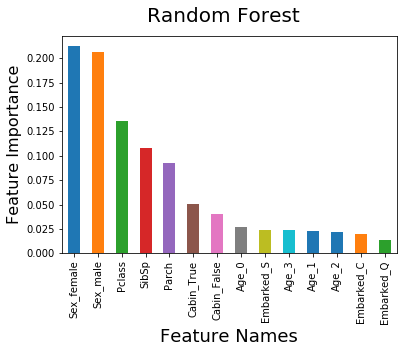

In [171]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators = 100)
randomforest.fit(TRAIN_X, TRAIN_Y)
y_pred_rf = randomforest.predict(TEST_X)
print(classification_report(TEST_Y, y_pred_rf))

print(randomforest.feature_importances_)

print("-"*40)

col_names = list(TRAIN_X.columns)
featur_imp = pd.Series(randomforest.feature_importances_, col_names).sort_values(ascending = False)
featur_imp.plot(kind = 'bar')
plt.suptitle('Random Forest', fontsize=20)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

# Adaboost Algorithm

             precision    recall  f1-score   support

          0       0.82      0.93      0.87        57
          1       0.85      0.65      0.73        34

avg / total       0.83      0.82      0.82        91

----------------------------------------


/usr/local/lib/python3.5/dist-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


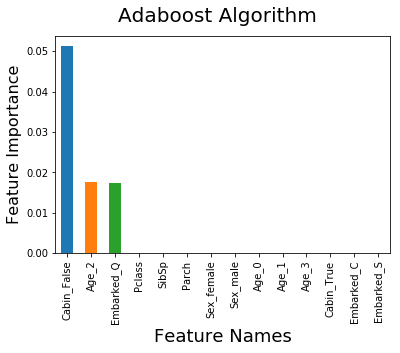

In [187]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=161, base_estimator= dt ,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clf.fit(TRAIN_X, TRAIN_Y)

y_pred_ada = clf.predict(TEST_X)
print(classification_report(TEST_Y, y_pred_ada))

print("-"*40)

col_names = list(TRAIN_X.columns)
featur_imp = pd.Series(clf.feature_importances_, col_names).sort_values(ascending = False)
featur_imp.plot(kind = 'bar')
plt.suptitle('Adaboost Algorithm', fontsize=20)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

# Stochastic Gradient Descent Algorithm

In [188]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(TRAIN_X, TRAIN_Y)
y_pred_sgd = sgd.predict(TEST_X)

print("Classification Report")
print("-"*40)
print(classification_report(TEST_Y, y_pred_sgd))

Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.74      0.81        57
          1       0.66      0.85      0.74        34

avg / total       0.81      0.78      0.78        91



/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Gaussian Naive Bayes Alogorithm

In [189]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(TRAIN_X, TRAIN_Y)
y_pred_GNB = GNB.predict(TEST_X)

print("Classification Report")
print("-"*40)
print(classification_report(TEST_Y, y_pred_GNB))

Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.81      0.83        57
          1       0.70      0.76      0.73        34

avg / total       0.80      0.79      0.79        91



# SVC Algorithm

In [190]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(TRAIN_X, TRAIN_Y)
y_pred_svc = svc.predict(TEST_X)

print("Classification Report")
print("-"*40)
print(classification_report(TEST_Y, y_pred_svc))

Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.81      0.89      0.85        57
          1       0.79      0.65      0.71        34

avg / total       0.80      0.80      0.80        91



# Linear SVC Algorithm

In [191]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(TRAIN_X, TRAIN_Y)
y_pred_Lsvc = linear_svc.predict(TEST_X)

print("Classification Report")
print("-"*40)
print(classification_report(TEST_Y, y_pred_Lsvc))

Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.83      0.84      0.83        57
          1       0.73      0.71      0.72        34

avg / total       0.79      0.79      0.79        91



# ROC-AUC Curve Testing

In [121]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# ROC-AUC Curve for Random Forest

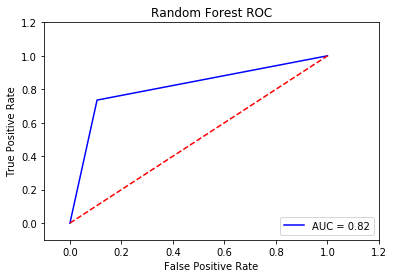

In [166]:
# ROC AUC Curve for Random Forest

actual = TEST_Y
predicted = y_pred_rf

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Random Forest ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC Curve for Adaboost

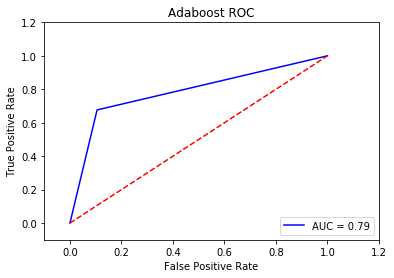

In [165]:
actual = TEST_Y
predicted = y_pred_ada

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Adaboost ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC for Stochastic Gradient Descent

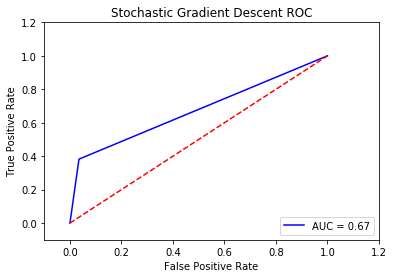

In [164]:
actual = TEST_Y
predicted = y_pred_sgd

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Stochastic Gradient Descent ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC Curve for SVC

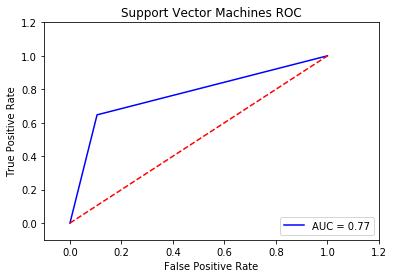

In [163]:
actual = TEST_Y
predicted = y_pred_svc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Support Vector Machines ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC Curve for SVC

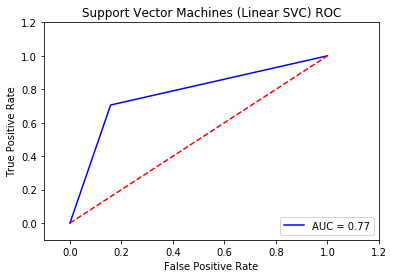

In [162]:
actual = TEST_Y
predicted = y_pred_Lsvc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Support Vector Machines (Linear SVC) ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC Curve for Gaussian Naive Bayes

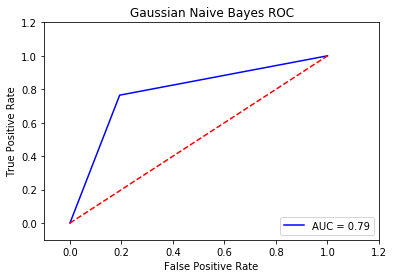

In [160]:
actual = TEST_Y
predicted = y_pred_GNB

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Gaussian Naive Bayes ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Tuning - Grid Search & Random Forest Classifier

             precision    recall  f1-score   support

          0       0.88      0.89      0.89        57
          1       0.82      0.79      0.81        34

avg / total       0.86      0.86      0.86        91



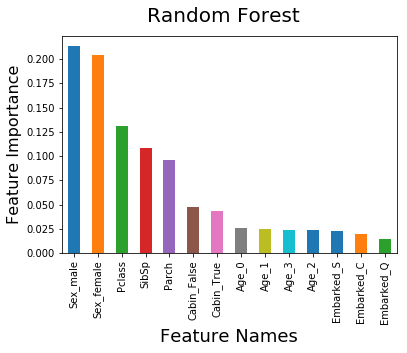

In [197]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=100, 
                       criterion='gini', max_depth=None,min_samples_split=2, 
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                       max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, 
                       verbose=0, warm_start=False,class_weight=None)

randomforest.fit(TRAIN_X, TRAIN_Y)
y_pred_rf = randomforest.predict(TEST_X)
print(classification_report(TEST_Y, y_pred_rf))

col_names = list(TRAIN_X.columns)
featur_imp = pd.Series(randomforest.feature_importances_, col_names).sort_values(ascending = False)
featur_imp.plot(kind = 'bar')
plt.suptitle('Random Forest', fontsize=20)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

# New Approach

In [225]:
data = df_3
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [226]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Data Cleaning & Missing Value Imputation

In [227]:
data.Embarked = data.Embarked.fillna('S')
data.Age = data.Age.fillna(data.Age.median())

In [228]:
data.Sex = data.Sex.replace('male', 0)
data.Sex = data.Sex.replace('female',1)

data.Embarked = data.Embarked.replace('S',0)
data.Embarked = data.Embarked.replace('C',1)
data.Embarked = data.Embarked.replace('Q',2)

In [229]:
data = data.drop(['Name','Cabin','Fare','PassengerId','Ticket'], axis = 1)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


# Model Training

             precision    recall  f1-score   support

          0       0.87      0.85      0.86       120
          1       0.76      0.79      0.77        71

avg / total       0.83      0.83      0.83       191



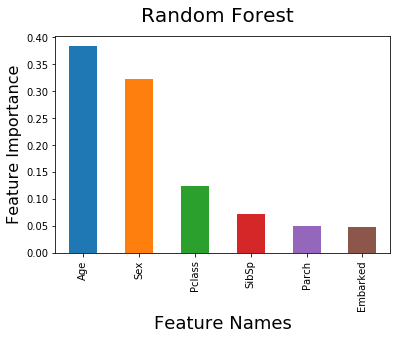

In [233]:
x_train_n = data[:700]
x_test_n = data[700:]

y_train_n = y[:700]
y_test_n = y[700:]


from sklearn.ensemble import RandomForestClassifier

r_new = RandomForestClassifier(n_estimators = 100)
r_new.fit(x_train_n, y_train_n)
y_pred_n = randomforest.predict(x_test_n)

print(classification_report(y_test_n, y_pred_n))

col_names = list(x_train_n.columns)
featur_imp = pd.Series(r_new.feature_importances_, col_names).sort_values(ascending = False)
featur_imp.plot(kind = 'bar')
plt.suptitle('Random Forest', fontsize=20)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

# Deep Neural Network Model

In [245]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense

Using TensorFlow backend.


In [256]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
#model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(TRAIN_X, TRAIN_Y, batch_size = 32, epochs = 200)

Epoch 1/200
800/800 [==============================] - 0s 438us/step - loss: 0.6911 - acc: 0.5950
Epoch 2/200
800/800 [==============================] - 0s 48us/step - loss: 0.6846 - acc: 0.6150
Epoch 3/200
800/800 [==============================] - 0s 62us/step - loss: 0.6732 - acc: 0.6150
Epoch 4/200
800/800 [==============================] - 0s 60us/step - loss: 0.6578 - acc: 0.6150
Epoch 5/200
800/800 [==============================] - 0s 58us/step - loss: 0.6379 - acc: 0.6600
Epoch 6/200
800/800 [==============================] - 0s 54us/step - loss: 0.6159 - acc: 0.6975
Epoch 7/200
800/800 [==============================] - 0s 48us/step - loss: 0.5918 - acc: 0.7137
Epoch 8/200
800/800 [==============================] - 0s 54us/step - loss: 0.5677 - acc: 0.7275
Epoch 9/200
800/800 [==============================] - 0s 71us/step - loss: 0.5461 - acc: 0.7500
Epoch 10/200
800/800 [==============================] - 0s 58us/step - loss: 0.5264 - acc: 0.7612
Epoch 11/200
800/800 [======

800/800 [==============================] - 0s 44us/step - loss: 0.4396 - acc: 0.8087
Epoch 85/200
800/800 [==============================] - 0s 45us/step - loss: 0.4403 - acc: 0.8125
Epoch 86/200
800/800 [==============================] - 0s 54us/step - loss: 0.4395 - acc: 0.8087
Epoch 87/200
800/800 [==============================] - 0s 48us/step - loss: 0.4391 - acc: 0.8062
Epoch 88/200
800/800 [==============================] - 0s 57us/step - loss: 0.4388 - acc: 0.8100
Epoch 89/200
800/800 [==============================] - 0s 45us/step - loss: 0.4387 - acc: 0.8100
Epoch 90/200
800/800 [==============================] - 0s 51us/step - loss: 0.4386 - acc: 0.8087
Epoch 91/200
800/800 [==============================] - 0s 52us/step - loss: 0.4385 - acc: 0.8087
Epoch 92/200
800/800 [==============================] - 0s 52us/step - loss: 0.4384 - acc: 0.8150
Epoch 93/200
800/800 [==============================] - 0s 52us/step - loss: 0.4379 - acc: 0.8087
Epoch 94/200
800/800 [===========

800/800 [==============================] - 0s 48us/step - loss: 0.4308 - acc: 0.8125
Epoch 167/200
800/800 [==============================] - 0s 53us/step - loss: 0.4293 - acc: 0.8137
Epoch 168/200
800/800 [==============================] - 0s 49us/step - loss: 0.4290 - acc: 0.8125
Epoch 169/200
800/800 [==============================] - 0s 46us/step - loss: 0.4292 - acc: 0.8125
Epoch 170/200
800/800 [==============================] - 0s 51us/step - loss: 0.4287 - acc: 0.8125
Epoch 171/200
800/800 [==============================] - 0s 48us/step - loss: 0.4287 - acc: 0.8113
Epoch 172/200
800/800 [==============================] - 0s 56us/step - loss: 0.4287 - acc: 0.8087
Epoch 173/200
800/800 [==============================] - 0s 42us/step - loss: 0.4289 - acc: 0.8137
Epoch 174/200
800/800 [==============================] - 0s 57us/step - loss: 0.4290 - acc: 0.8125
Epoch 175/200
800/800 [==============================] - 0s 47us/step - loss: 0.4280 - acc: 0.8125
Epoch 176/200
800/800 [=

In [257]:
y_pred = model.predict(TEST_X)
y_final = (y_pred > 0.5).astype(int).reshape(TEST_X.shape[0])

print(classification_report(TEST_Y, y_final))

             precision    recall  f1-score   support

          0       0.85      0.88      0.86        57
          1       0.78      0.74      0.76        34

avg / total       0.82      0.82      0.82        91

